## Pet Classification Model Using CNN.

Project 2 

DESCRIPTION

Build a CNN model that classifies the given pet images correctly into dog and cat images. 
    
    
   The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and nonfunctional requirements for the project, it also serves as an input for project scoping.


### Import modules

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2
import glob
import os

Using TensorFlow backend.


In [2]:
#Return a list of paths matching a pathname pattern.

In [5]:
def call(x,shape):
    label = ['dogs','cats']
    train=[]
    test=[]
    for i in x:
        for j in label:
            a=os.path.join("C:\\Users\\nilesh\\Desktop\\Master\\Deeplearning\\DL project 2\\data\\"+i+"\\"+j+"/*g")
            for g in glob.glob(a):
                im = cv2.imread(g)
                p = cv2.resize(im,(shape,shape), interpolation=cv2.INTER_CUBIC)
                train.append(p)
                if j=="dogs":
                    test.append(0)
                else:
                    test.append(1)
    return np.array(train),np.array(test)

In [6]:
x_train , y_train = call(["train"],32)
x_train.shape

(40, 32, 32, 3)

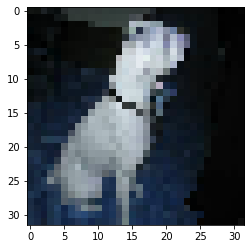

In [7]:
x_test , y_test = call(["test"],32)
plt.imshow(x_train[10])

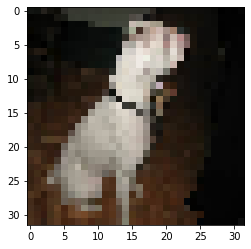

In [8]:
plt.imshow(cv2.cvtColor(x_train[10],cv2.COLOR_BGR2RGB))

input later

conv layer 1 with 32 filters of kernel size[5,5],

pooling layer 1 with pool size[2,2] and stride 2

conv layer 2 with 64 filters of kernel size[5,5],

pooling layer 2 with pool size[2,2] and stride 2

dense layer whose output size is fixed in the hyper parameter: fc_size=32

drop out layer with droput probability 0.4

predict the class by doing a softmax on the output of the dropout layers

In [24]:
tf.reset_default_graph()
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype = tf.int64)

w1 = tf.Variable(initial_value = tf.random.normal(mean = 0 , stddev = 0.1 , shape = [5,5,3,32]) , dtype=tf.float32)
b1 = tf.Variable(initial_value = np.zeros(32),dtype = tf.float32)
c1 = tf.nn.relu(tf.nn.conv2d(input= x , filter = w1 , strides= [1,1,1,1] , padding = 'VALID')+b1)
pool1 = tf.nn.max_pool(value = c1 , ksize=[1,2,2,1] , strides = [1,2,2,1], padding='VALID')


w2 = tf.Variable(initial_value = tf.random.normal(mean= 0 , stddev = 0.1 , shape = [5,5,32,64]), dtype = tf.float32)
b2 = tf.Variable(initial_value = np.zeros(64), dtype = tf.float32)
c2 = tf.nn.relu(tf.nn.conv2d(input=pool1 , filter = w2 , strides = [1,1,1,1] , padding = 'VALID')+b2)
pool2 = tf.nn.max_pool(value = c2, ksize=[1,2,2,1], strides = [1,2,2,1] , padding = 'VALID')

f = tf.contrib.layers.flatten(pool2)

w3 = tf.Variable(initial_value = tf.random.normal(mean=0 , stddev = 0.1 , shape=[1600,32]))
b3 = tf.Variable(initial_value = np.zeros(32), dtype = tf.float32 )
h1 = tf.nn.relu(tf.matmul(f,w3)+b3)
y1 = tf.layers.dropout(h1, rate= 0.4)

w4 = tf.Variable(initial_value = tf.random.normal(mean=0 , stddev = 0.1 , shape=[32,2]))
b4 = tf.Variable(initial_value = np.zeros(2), dtype = tf.float32 )
y_o = tf.matmul(y1,w4)+b4
#y_o = tf.nn.softmax(tf.matmul(y1,w4)+b4)

In [25]:
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels= y , logits = y_o)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
trainer = optimizer.minimize(loss)

# acc1 = tf.equal(tf.argmax(y_o,1),y)

# acc = tf.reduce_mean(tf.cast(acc1 , dtype = tf.float32))
acc1 = tf.equal(tf.argmax(y_o,1),y)
accuracy = tf.reduce_mean(tf.cast(acc1, dtype = tf.float32))

In [26]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(30):
    t = sess.run([trainer], feed_dict = {x:x_train/255 , y:y_train})
    l = sess.run([loss], feed_dict = {x:x_train/255 , y:y_train})
    at = sess.run(accuracy, feed_dict = {x:x_train/255 , y:y_train})
    ac = sess.run(accuracy, feed_dict = {x:x_test/255 , y:y_test})
    print("loss = %0.2f , train acc = %f , test acc = %f "%(np.mean(l),at,ac))

loss = 1.03 , train acc = 0.525000 , test acc = 0.500000 
loss = 0.88 , train acc = 0.525000 , test acc = 0.500000 
loss = 0.62 , train acc = 0.650000 , test acc = 0.350000 
loss = 0.67 , train acc = 0.550000 , test acc = 0.450000 
loss = 0.70 , train acc = 0.575000 , test acc = 0.450000 
loss = 0.60 , train acc = 0.625000 , test acc = 0.500000 
loss = 0.52 , train acc = 0.800000 , test acc = 0.400000 
loss = 0.53 , train acc = 0.700000 , test acc = 0.400000 
loss = 0.55 , train acc = 0.650000 , test acc = 0.500000 
loss = 0.51 , train acc = 0.750000 , test acc = 0.450000 
loss = 0.46 , train acc = 0.850000 , test acc = 0.300000 
loss = 0.44 , train acc = 0.950000 , test acc = 0.350000 
loss = 0.43 , train acc = 0.900000 , test acc = 0.500000 
loss = 0.43 , train acc = 0.875000 , test acc = 0.400000 
loss = 0.41 , train acc = 0.900000 , test acc = 0.450000 
loss = 0.37 , train acc = 0.950000 , test acc = 0.400000 
loss = 0.34 , train acc = 1.000000 , test acc = 0.400000 
loss = 0.34 , 

In [27]:
x_train_result = sess.run(y_o , feed_dict={x:x_test})
x_train_lenth = x_train_result.shape[0]
np.sum(np.argmax(x_train_result,axis=1)==y_test)/ x_train_lenth

0.55